# ***This is the Jupyter Notebook for my car crash severity project***

In [6]:
import pandas as pd
import numpy as np
print("Hello Capstone Project Course")

Hello Capstone Project Course


## Import the required Libraries

In [7]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

## Read the Seattle Department of Traffic CSV file which will be used to train the ML models

In [8]:
url = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
print('Download complete')

Download complete


In [9]:
df = pd.read_csv(url)
print('CSV stored in dataframe')
df.head()

d:\Users\Mario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


CSV stored in dataframe


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Take the important columns and drop the NA values

In [10]:
df_important_columns = df[['SEVERITYCODE','COLLISIONTYPE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND','INCDTTM']]
df_important_columns.head()
df_important_columns.dropna()

,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,INCDTTM
0,2,Angles,Intersection,Overcast,Wet,Daylight,3/27/2013 2:54:00 PM
1,1,Sideswipe,Block,Raining,Wet,Dark - Street Lights On,12/20/2006 6:55:00 PM
2,1,Parked Car,Block,Overcast,Dry,Daylight,11/18/2004 10:20:00 AM
3,1,Other,Block,Clear,Dry,Daylight,3/29/2013 9:26:00 AM
4,2,Angles,Intersection,Raining,Wet,Daylight,1/28/2004 8:04:00 AM
...,...,...,...,...,...,...,...
194668,2,Head On,Block,Clear,Dry,Daylight,11/12/2018 8:12:00 AM
194669,1,Rear Ended,Block,Raining,Wet,Daylight,12/18/2018 9:14:00 AM
194670,2,Left Turn,Intersection,Clear,Dry,Daylight,1/19/2019 9:25:00 AM
194671,2,Cycles,Intersection,Clear,Dry,Dusk,1/15/2019 4:48:00 PM


In [11]:
df_important_columns.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.890812
              2               0.109188
Block         1               0.762885
              2               0.237115
Intersection  1               0.572476
              2               0.427524
Name: SEVERITYCODE, dtype: float64

In [12]:
df_important_columns.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             1               0.678227
                2               0.321773
Ice             1               0.774194
                2               0.225806
Oil             1               0.625000
                2               0.375000
Other           1               0.674242
                2               0.325758
Sand/Mud/Dirt   1               0.693333
                2               0.306667
Snow/Slush      1               0.833665
                2               0.166335
Standing Water  1               0.739130
                2               0.260870
Unknown         1               0.950325
                2               0.049675
Wet             1               0.668134
                2               0.331866
Name: SEVERITYCODE, dtype: float64

In [13]:
df_important_columns.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

COLLISIONTYPE  SEVERITYCODE
Angles         1               0.607083
               2               0.392917
Cycles         2               0.876085
               1               0.123915
Head On        1               0.569170
               2               0.430830
Left Turn      1               0.605123
               2               0.394877
Other          1               0.742142
               2               0.257858
Parked Car     1               0.944527
               2               0.055473
Pedestrian     2               0.898305
               1               0.101695
Rear Ended     1               0.569639
               2               0.430361
Right Turn     1               0.793978
               2               0.206022
Sideswipe      1               0.865334
               2               0.134666
Name: SEVERITYCODE, dtype: float64

In [14]:
df_important_columns.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.732143
                          2               0.267857
Clear                     1               0.677509
                          2               0.322491
Fog/Smog/Smoke            1               0.671353
                          2               0.328647
Other                     1               0.860577
                          2               0.139423
Overcast                  1               0.684456
                          2               0.315544
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   1               0.662815
                          2               0.337185
Severe Crosswind          1               0.720000
                          2               0.280000
Sleet/Hail/Freezing Rain  1               0.752212
                          2               0.247788
Snowing                   1               0

In [15]:
df_important_columns.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.782694
                          2               0.217306
Dark - Street Lights Off  1               0.736447
                          2               0.263553
Dark - Street Lights On   1               0.701589
                          2               0.298411
Dark - Unknown Lighting   1               0.636364
                          2               0.363636
Dawn                      1               0.670663
                          2               0.329337
Daylight                  1               0.668116
                          2               0.331884
Dusk                      1               0.670620
                          2               0.329380
Other                     1               0.778723
                          2               0.221277
Unknown                   1               0.955095
                          2               0.044905
Name: SEVERITYCODE, dtype: float64

## Convert the Incident Time column in date time format

In [16]:
df_important_columns['INCDTTM'] = pd.to_datetime(df_important_columns['INCDTTM'])
df_important_columns['DAYOFWEEK'] = df_important_columns['INCDTTM'].dt.dayofweek
df_important_columns.head()

<ipython-input-16-48008350e908>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important_columns['INCDTTM'] = pd.to_datetime(df_important_columns['INCDTTM'])
<ipython-input-16-48008350e908>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_important_columns['DAYOFWEEK'] = df_important_columns['INCDTTM'].dt.dayofweek


,SEVERITYCODE,COLLISIONTYPE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,INCDTTM,DAYOFWEEK
0,2,Angles,Intersection,Overcast,Wet,Daylight,2013-03-27 14:54:00,2
1,1,Sideswipe,Block,Raining,Wet,Dark - Street Lights On,2006-12-20 18:55:00,2
2,1,Parked Car,Block,Overcast,Dry,Daylight,2004-11-18 10:20:00,3
3,1,Other,Block,Clear,Dry,Daylight,2013-03-29 09:26:00,4
4,2,Angles,Intersection,Raining,Wet,Daylight,2004-01-28 08:04:00,2


## One time hot encode all of the categorical data and append

In [17]:
df_important_columns.groupby(['DAYOFWEEK'])['SEVERITYCODE'].value_counts(normalize=True)

DAYOFWEEK  SEVERITYCODE
0          1               0.697281
           2               0.302719
1          1               0.694250
           2               0.305750
2          1               0.695705
           2               0.304295
3          1               0.692470
           2               0.307530
4          1               0.704358
           2               0.295642
5          1               0.706196
           2               0.293804
6          1               0.722022
           2               0.277978
Name: SEVERITYCODE, dtype: float64

In [18]:
ColFeature = df_important_columns[['DAYOFWEEK']]
ColFeature = pd.concat([ColFeature,pd.get_dummies(df['ADDRTYPE']),pd.get_dummies(df['COLLISIONTYPE']),pd.get_dummies(df['WEATHER']),pd.get_dummies(df['ROADCOND']),pd.get_dummies(df['LIGHTCOND'])], axis=1)
ColFeature.head()

,DAYOFWEEK,Alley,Block,Intersection,Angles,Cycles,Head On,Left Turn,Other,Parked Car,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,2,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,3,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,4,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## Store Independent Features and Dependent Features

In [19]:
X = ColFeature
y = df_important_columns['SEVERITYCODE'].values

## Pre processing Normalization

In [20]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.48852801, -0.06223095, -1.36876932,  1.41129279,  2.14811072,
        -0.16915004, -0.10249953, -0.27517219, -0.37234172, -0.57196238,
        -0.18744809, -0.46074827, -0.12417149, -0.32510694, -0.01696304,
        -1.15340914, -0.05414257, -0.06551471,  2.45445634, -0.00506801,
        -0.45298634, -0.011333  , -0.02409974, -0.06841713, -0.28988624,
        -1.33213439, -0.07905204, -0.01813462, -0.02604842, -0.01963186,
        -0.07200071, -0.02431221, -0.28975087,  1.76085874, -0.08920831,
        -0.07872239, -0.576075  , -0.00751719, -0.1141037 ,  0.82233559,
        -0.17682024, -0.03476509, -0.27267986],
       [-0.48852801, -0.06223095,  0.73058329, -0.70857019, -0.46552535,
        -0.16915004, -0.10249953, -0.27517219, -0.37234172, -0.57196238,
        -0.18744809, -0.46074827, -0.12417149,  3.07591099, -0.01696304,
        -1.15340914, -0.05414257, -0.06551471, -0.4074222 , -0.00506801,
         2.2075721 , -0.011333  , -0.02409974, -0.06841713, -0.28988624,
   

## Train Test Split 

In [21]:
#splitting now
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(155738, 43)
(38935, 43)
(155738,)
(38935,)


21 0.738512906125594
22 0.742237061769616
23 0.7404391935276743


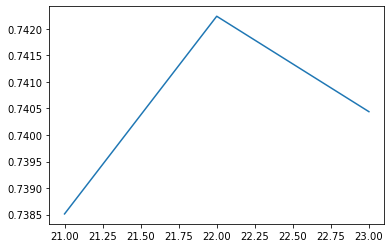

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = range(21,24)
score = {}
score_list = []
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
    y_knn_hat = knn.predict(X_test)
    score[k] = metrics.accuracy_score(Y_test, y_knn_hat)
    score_list.append(metrics.accuracy_score(Y_test,y_knn_hat))
    print(k,score_list[k-21])
plt.plot(k_range,score_list)

In [23]:
print( "The best accuracy was with", max(score.values()), "with k=", max(score, key=score.get))

The best accuracy was with 0.742237061769616 with k= 22



## Running K Folds CV to ensure the value of K doesnt overfit the model

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=4)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_c22 = KNeighborsClassifier(n_neighbors=22)
#train model with cv of 5 
cv_scores = cross_val_score(knn_c22, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.73519969 0.73317067 0.73797355 0.72715364 0.72931114]
cv_scores mean:0.7325617386145451


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_c15 = KNeighborsClassifier(n_neighbors=15)
#train model with cv of 5 
cv_scores = cross_val_score(knn_c15, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

## K Nearest Neighbour trained for most optimum K i.e K = 4

In [25]:
knn= KNeighborsClassifier(n_neighbors = 4).fit(X_train, Y_train)
y_knn_hat = knn.predict(X_test)

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
collision_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
collision_tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [27]:
collision_tree_fit = collision_tree.fit(X_train, Y_train)
y_dt_hat = collision_tree_fit.predict(X_test)
y_dt_hat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Support Vector Machine Learning

In [28]:
from sklearn import svm
SVM_model = svm.SVC()
svm_fit = SVM_model.fit(X_train, Y_train)
y_svm_hat = svm_fit.predict(X_test)
y_svm_hat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr_fit = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
lr_fit

LogisticRegression(C=0.01, solver='liblinear')

In [30]:
y_lr_hat = lr_fit.predict(X_test)
y_lr_hat_prob = lr_fit.predict_proba(X_test)
y_lr_hat_prob[0:5]

array([[0.86379678, 0.13620322],
       [0.60410381, 0.39589619],
       [0.93157061, 0.06842939],
       [0.59472984, 0.40527016],
       [0.51533385, 0.48466615]])

## Evaluation Metrics to determine the best ML method

In [33]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## Jaccard Index and F1 Score for KNN, Decision Tree and SVM

In [34]:
#K Nearest Neighbour Jacard and F1 Score
print("KNN Jaccard index: %.2f" % jaccard_score(Y_test, y_knn_hat))
print("KNN F1-score: %.2f" % f1_score(Y_test, y_knn_hat, average='weighted') )

#Decision Tree Jacard and F1 Score
print("Decision Tree Jaccard index: %.2f" % jaccard_score(Y_test, y_dt_hat))
print("Decision Tree F1-score: %.2f" % f1_score(Y_test, y_dt_hat, average='weighted') )

#SVM Jacard and F1 Score
print("SVM Jaccard index: %.2f" % jaccard_score(Y_test, y_svm_hat))
print("SVM F1-score: %.2f" % f1_score(Y_test, y_svm_hat, average='weighted') )

KNN Jaccard index: 0.70
KNN F1-score: 0.70
Decision Tree Jaccard index: 0.74
Decision Tree F1-score: 0.69
SVM Jaccard index: 0.74
SVM F1-score: 0.69


## Jaccard Index, F1 Score and Log loss for Logistic Regression

In [35]:
# Logicstic Regression Jacard, F1 Score, Log Loss
print("LogisticRegression Jaccard index: %.2f" % jaccard_score(Y_test, y_lr_hat))
print("LogisticRegression F1-score: %.2f" % f1_score(Y_test, y_lr_hat, average='weighted') )
print("LogisticRegression LogLoss: %.2f" % log_loss(Y_test, y_lr_hat_prob))

LogisticRegression Jaccard index: 0.74
LogisticRegression F1-score: 0.69
LogisticRegression LogLoss: 0.49


## Report

|          Algorithm| Jaccard|   F1| LogLoss|
|----------:        |:------:|:---:|:------:|
|                KNN|    0,70| 0,70|      NA|
|      Decision Tree|    0,74| 0,69|   	  NA|
|                SVM|    0,74| 0,69|   	  NA|
|Logistic Regression|    0,74| 0,69|    0,49|